[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
(150,)
(150, 4)
['setosa' 'versicolor' 'virginica']


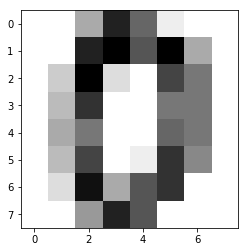

In [2]:
# -*- coding: utf-8 -*-
"""
Created on Thu Feb 15 08:43:06 2018

@author: jpmaldonado
"""


'''
LECTURE OUTLINE

* What is machine learning? (Discussion, examples)
* Goals of machine learning:
        - Automatic decision making
        - Generalization

* Supervised Learning
    - Classification
    - Regression
    - Ranking
* Unsupervised Learning
    - Clustering
    - Dimensionality Reduction
    - Anomaly Detection
    
* scikit-learn
'''

####################################
## Data representation in sklearn
####################################

# In scikit-learn data is represented as a two dimensional array
# of shape [n_samples, n_features]

# Tabular data
from sklearn.datasets import load_iris

iris = load_iris() # a 'Bunch' object, some sort of dict

iris.keys() # See what's inside

n_samples, n_features = iris.data.shape
print(iris.target)
print(iris.target.shape)
print(iris.data.shape)
print(iris.target_names)

# Image data
from sklearn.datasets import load_digits
digits = load_digits()

# What's inside?
digits.keys()
digits.images[0]
digits.data[0]

import matplotlib.pyplot as plt

plt.imshow(digits.images[0])
plt.imshow(digits.images[0], cmap = plt.cm.binary)



In [3]:
####################################
# Classification
####################################

# Which model to use?
# http://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

X, y = iris.data, iris.target

from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()

# Train/ test split
y[0:50]
y[50:100]
y[100:]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.8,
                                                    test_size = 0.2, 
                                                    random_state = 123, 
                                                    stratify = y)

clf.fit(X_train,y_train) # Fit the model
y_preds = clf.predict(X_test) # Prediction
sum(y_test!=y_preds) # How many errors?
y_preds[y_test != y_preds] #Where is the error?
y_test[y_test != y_preds]
## QUESTION: Does this suggest a way to improve our classifier?

#Try a different classifier: logistic regression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_preds = clf.predict(X_test)
sum(y_test != y_preds)

# LR can also predict class probabilities
clf.predict_proba(X_test)


array([[4.13655305e-02, 7.54918189e-01, 2.03716280e-01],
       [8.17665650e-01, 1.82244914e-01, 8.94356555e-05],
       [5.92179391e-04, 1.80259502e-01, 8.19148319e-01],
       [3.74822805e-03, 3.02571905e-01, 6.93679867e-01],
       [8.22389770e-01, 1.77511366e-01, 9.88645576e-05],
       [8.45448771e-01, 1.54504556e-01, 4.66737486e-05],
       [2.55260053e-04, 3.26315249e-01, 6.73429490e-01],
       [2.47175172e-03, 4.96684655e-01, 5.00843594e-01],
       [5.29101257e-03, 3.42716087e-01, 6.51992900e-01],
       [7.96475511e-01, 2.03473883e-01, 5.06062252e-05],
       [9.09202726e-01, 9.07774963e-02, 1.97776752e-05],
       [5.62332639e-03, 4.96747244e-01, 4.97629430e-01],
       [1.04980883e-03, 3.06937555e-01, 6.92012636e-01],
       [1.03611267e-02, 5.75452944e-01, 4.14185930e-01],
       [2.65878566e-04, 2.57682344e-01, 7.42051777e-01],
       [9.90619734e-03, 7.10967069e-01, 2.79126733e-01],
       [8.52311381e-01, 1.47617063e-01, 7.15564359e-05],
       [9.11840538e-01, 8.81452

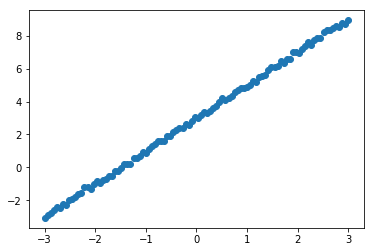

In [6]:
####################################
# Regression
####################################
import numpy as np

x = np.linspace(-3,3,100)
y = 2*x + 3 + 0.1*np.random.normal(size=len(x))

plt.scatter(x,y)


In [7]:
x = x.reshape(-1,1)

from sklearn.linear_model import LinearRegression

x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    train_size = 0.8, 
                                                    test_size = 0.2, 
                                                    random_state = 123
                                                    )

clf = LinearRegression()
clf.fit(x_train, y_train)
print(clf.coef_)
print(clf.intercept_)


# Measuring error: MSE

y_preds = clf.predict(x_test)
MSE = sum((y_preds-y_test)**2)/len(y_test)

clf.predict([[4.5]])



[2.00598743]
2.9946897179012084


array([12.02163313])

In [5]:
## EXERCISE: Try linear regression on the Boston dataset
from sklearn.datasets import load_boston
boston = load_boston()
